In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import sklearn

In [2]:
ofisB= pd.read_csv(r"C:\Users\cfern\Desktop\ML Noya\oficinasBCN.csv")
ofisM= pd.read_csv(r"C:\Users\cfern\Desktop\ML Noya\oficinasMAD.csv")
ofisM.drop(["Unnamed: 0","ad_town"],axis=1,inplace=True)
ofisB.drop(["Unnamed: 0","ad_town"],axis=1,inplace=True)
ofisM.tail()

,ad_price,ad_area,ad_latitude,ad_longitude,censustract_id,ad_postalcode,ad_floornumber,ad_bathnumber,ad_haslift,ad_hasparkingspace,tamaños
4888,3501,269,41.391106,2.160176,801902083.0,8008.0,4,2,1,0,2
4889,875,125,41.402172,2.192977,801910042.0,8018.0,0,2,0,0,1
4890,1700,220,41.381553,2.162757,801902166.0,8011.0,2,2,1,0,2
4891,1250,120,41.397053,2.149385,801905067.0,8006.0,6,1,1,0,1
4892,760,60,41.403330,2.133798,801905044.0,8022.0,3,1,1,0,1


In [3]:
X_trainM, X_testM, y_trainM, y_testM = train_test_split(ofisM.drop('ad_price', axis=1),
                                                    ofisM['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)
X_trainB, X_testB, y_trainB, y_testB = train_test_split(ofisB.drop('ad_price', axis=1),
                                                    ofisB['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)

In [4]:
#vamos a probar que parametros me dna mejor score en un modelo de  arbol regresor entrenandolo con el dataset de oficinas de Madrid 
parameters = {
    'max_depth': np.arange(1, 10),
    'random_state': np.arange(0, 10),
    "min_samples_leaf":  np.arange(2, 10),
    "min_samples_split": np.arange(2, 10)
}


dtr= DecisionTreeRegressor()
kfold = KFold(n_splits=10)

prueba = RandomizedSearchCV(estimator = dtr,
                  param_distributions = parameters,
                  n_jobs = 1,
                  verbose=5,
                  n_iter=100,
                  scoring="neg_mean_absolute_error",
                  cv = kfold)

prueba .fit(X_trainM, y_trainM)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-2378.999 total time=   0.0s
[CV 2/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-2528.454 total time=   0.0s
[CV 3/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-2562.319 total time=   0.0s
[CV 4/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-3025.358 total time=   0.0s
[CV 5/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-2413.582 total time=   0.0s
[CV 6/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-2131.590 total time=   0.0s
[CV 7/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-3190.128 total time=   0.0s
[CV 8/10] END max_depth=3, min_samples_leaf=6, min_samples_split=7, random_state=5;, score=-260

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='neg_mean_absolute_error', verbose=5)

In [5]:

print("Best estimator Madrid:", prueba.best_estimator_.score(X_testM, y_testM))
print("Best params Madrid:", prueba.best_params_)


Best estimator Madrid: 0.5621464318744762
Best params Madrid: {'random_state': 5, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 9}


In [6]:
predsM = prueba.best_estimator_.predict(X_testM)

print('MAE:', mean_absolute_error(y_testM,predsM))
print('MAPE:', mean_absolute_percentage_error(y_testM, predsM))
print('MSE:', mean_squared_error(y_testM, predsM))
print('RMSE:', np.sqrt(mean_squared_error(y_testM, predsM)))

MAE: 1738.7440103659983
MAPE: 0.2844901406333189
MSE: 132528843.26026267
RMSE: 11512.11723621084


In [7]:
#Para Barcelona 
#vamos a probar que parametros me dna mejor score en un modelo de  arbol regresor entrenandolo con el dataset de oficinas de Madrid 
parametersB = {
    'max_depth': np.arange(1, 10),
    'random_state': np.arange(0, 10),
    "min_samples_leaf":  np.arange(2, 10),
    "min_samples_split": np.arange(2, 10)
}


dtrB= DecisionTreeRegressor()
kfoldB = KFold(n_splits=10)

pruebaB = RandomizedSearchCV(estimator = dtrB,
                  param_distributions = parametersB,
                  n_jobs = 1,
                  verbose=5,
                  n_iter=100,
                  scoring="neg_mean_absolute_error",
                  cv = kfoldB)

pruebaB .fit(X_trainB, y_trainB)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-2220.003 total time=   0.0s
[CV 2/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-2639.671 total time=   0.0s
[CV 3/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-2498.268 total time=   0.0s
[CV 4/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-2456.622 total time=   0.0s
[CV 5/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-2069.908 total time=   0.0s
[CV 6/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-2191.878 total time=   0.0s
[CV 7/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-2311.611 total time=   0.0s
[CV 8/10] END max_depth=8, min_samples_leaf=5, min_samples_split=4, random_state=2;, score=-189

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='neg_mean_absolute_error', verbose=5)

In [8]:

print("Best estimator Barcelona:", pruebaB.best_estimator_.score(X_testB, y_testB))
print("Best params Barcelona :", pruebaB.best_params_)

Best estimator Barcelona: 0.8972646228055781
Best params Barcelona : {'random_state': 8, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 9}


In [9]:
predsB = pruebaB.best_estimator_.predict(X_testB)

In [10]:
print('MAE:', mean_absolute_error(y_testB,predsB))
print('MAPE:', mean_absolute_percentage_error(y_testB, predsB))
print('MSE:', mean_squared_error(y_testB, predsB))
print('RMSE:', np.sqrt(mean_squared_error(y_testB, predsB)))

MAE: 2213.27808869044
MAPE: 0.436299154591628
MSE: 27312711.280929454
RMSE: 5226.156453927633


In [16]:
tree_regM= DecisionTreeRegressor(random_state= 7, min_samples_split= 4, min_samples_leaf= 3, max_depth= 9)
tree_regB= DecisionTreeRegressor(random_state= 8, min_samples_split= 7, min_samples_leaf= 3, max_depth= 9)
tree_regM.fit(X_trainM,y_trainM) 
tree_regB.fit(X_trainB,y_trainB) 

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=7,
                      random_state=8)

Text(0.5, 1.0, 'Arbol  oficinas Barcelona ')

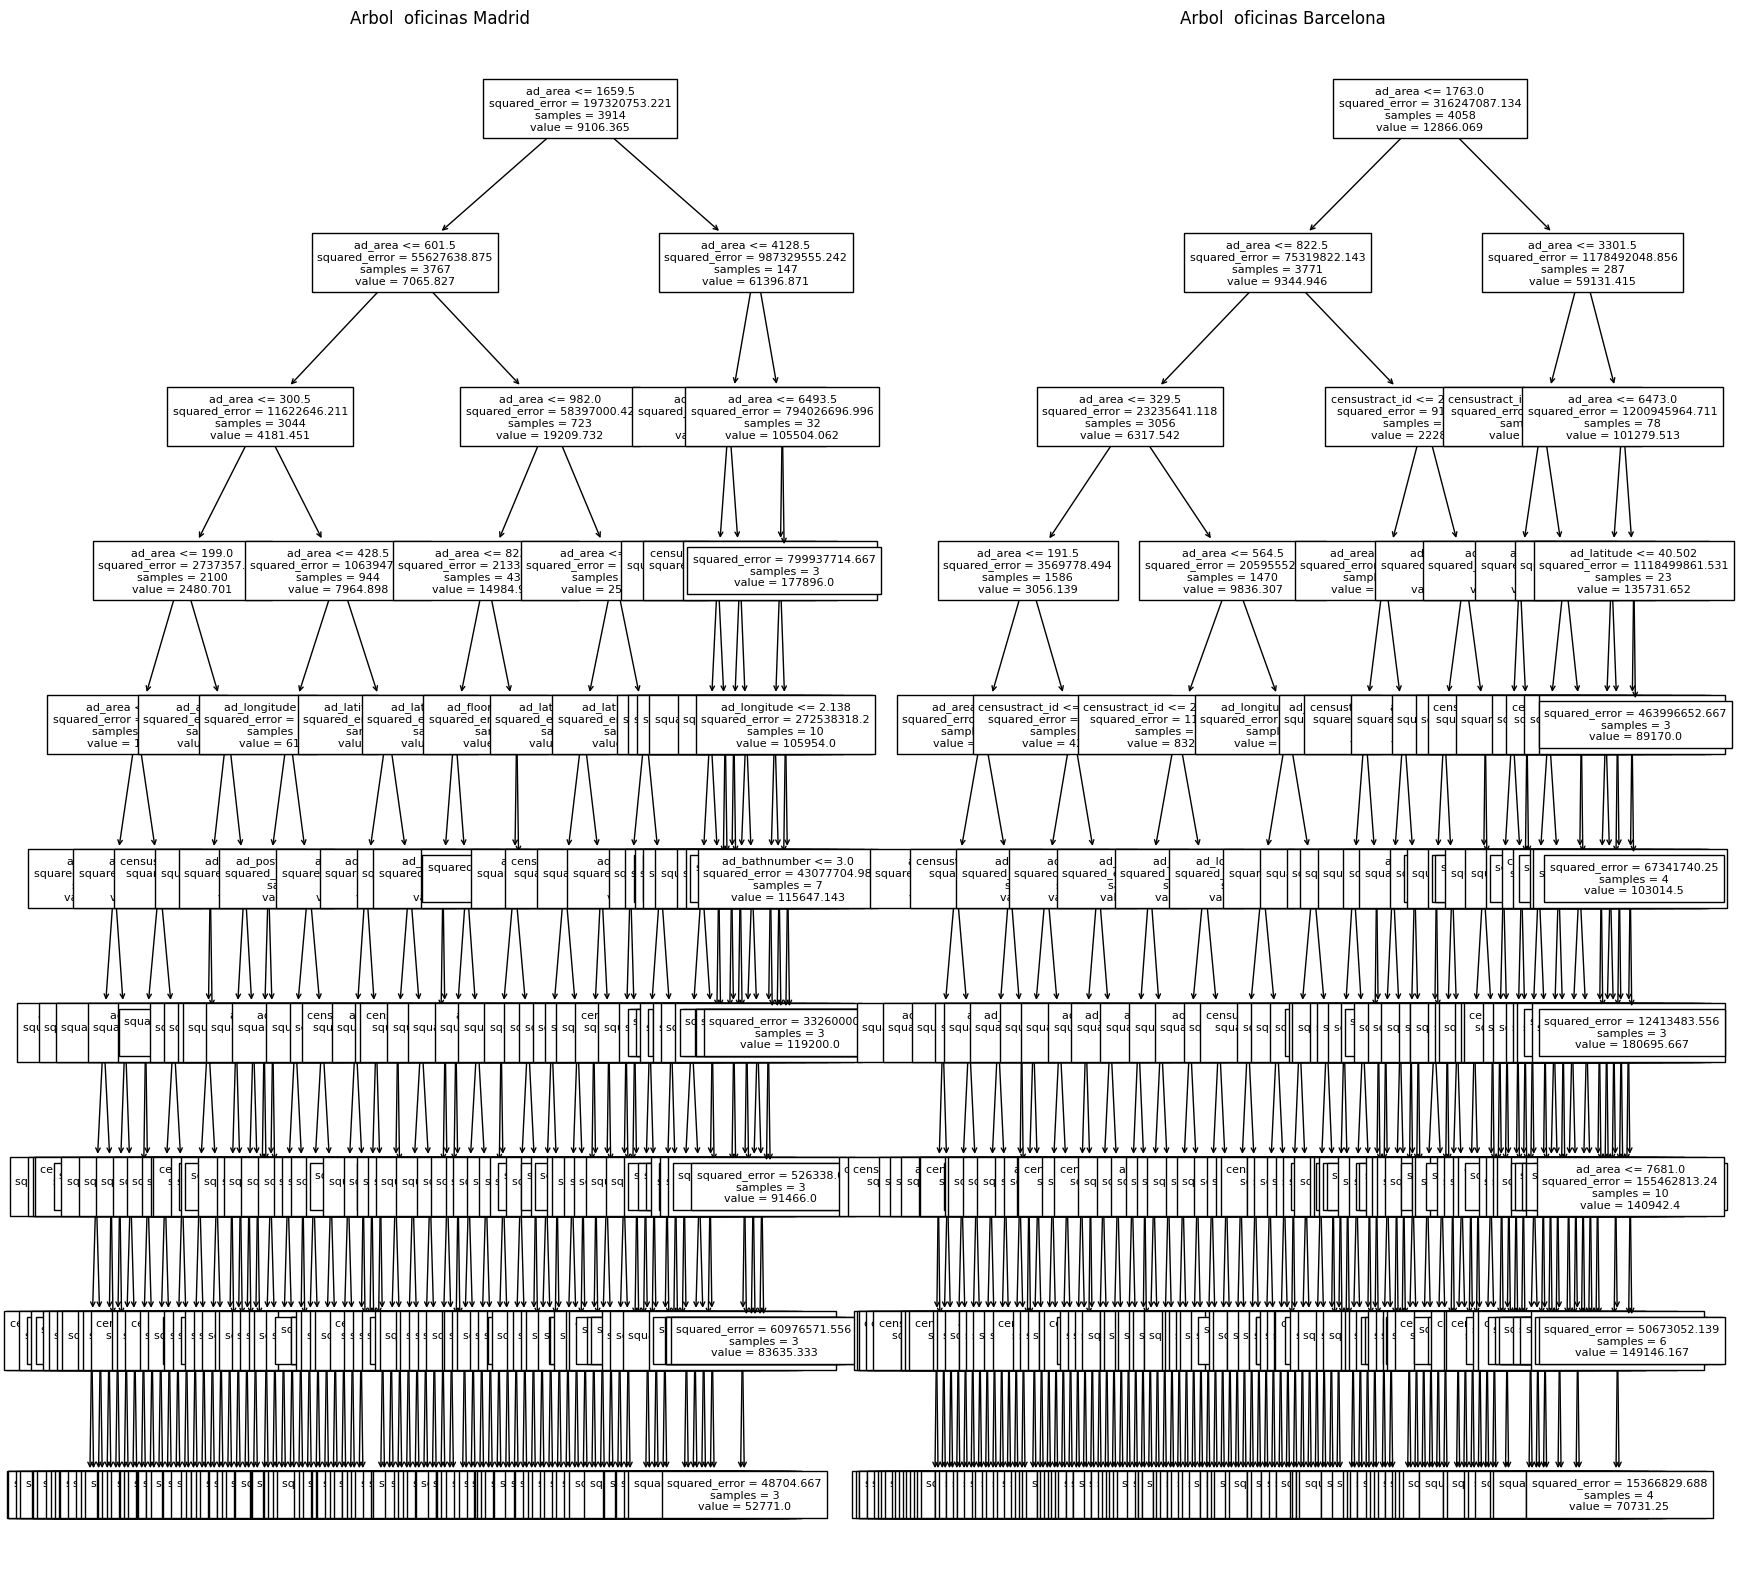

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 20))


sklearn.tree.plot_tree(tree_regM,class_names="actual",feature_names= X_trainM.columns, fontsize = 8,ax=axes[0])
axes[0].set_title("Arbol  oficinas Madrid")
sklearn.tree.plot_tree(tree_regB,class_names="actual",feature_names= X_trainB.columns, fontsize = 8,ax=axes[1]);
axes[1].set_title("Arbol  oficinas Barcelona ")